### Steps for the task:
    
1. Train a 2-layers-MLP on Fashion-MNIST.
2. Apply five different initialization approaches to the model. Pytorch has already implemented several approaches in the package (https://pytorch.org/docs/stable/nn.init.html). 
3. Compare and report your results in a jupyter notebook. You can use the functions classification_report and confusion_matrix from https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [2]:
import torch 
import keras
from torch import nn, optim
from torchvision import datasets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random;
from time import time;
import math;

In [ ]:
idx = torch.tensor(CIFAR10_train.targets) == 1
idx += torch.tensor(CIFAR10_train.targets) == 2
dset_train = torch.utils.data.dataset.Subset(CIFAR100_train, np.where(idx==1)[0])


In [24]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# Load training and test datasets
train_data = datasets.FashionMNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False,
                                  download=True, transform=transform)


print(len(train_data.targets))

60000


In [25]:
def get_indices(dataset,class_name):
    indices =  []
    for i in range(len(dataset.targets)):
        if dataset.targets[i] == class_name:
            indices.append(i)
    return indices


idx = get_indices(train_data, 1)
loader = torch.utils.data.DataLoader(train_data,batch_size=64, sampler = torch.utils.data.sampler.SubsetRandomSampler(idx))

for idx, (data, target) in enumerate(loader):
    print(target.shape)

torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64

### Creating Dataloaders from Datasets

In [17]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

AttributeError: 'FashionMNIST' object has no attribute 'shape'

In [5]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)


print(len(train_data))

torch.Size([20, 1, 28, 28])
torch.Size([20])
60000


### Visualizing dataset to get more insight

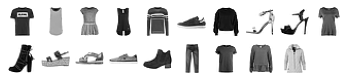

In [6]:
figure = plt.figure()
num_of_images = 19
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Weight Initilization
1. Initializing with Normal weight
2. Initializing with Uniform weight
3. Initializing with all ones weight
4. Initializing with all zeros weight
5. Initializing with diagonal ones weight

In [7]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


### Model Configuration with loss function

In [8]:
criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

### Training all 5 models with intialized weight simultaneously

In [103]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 10
losses = []
for e in range(epochs):
    running_loss = 0
    
    for images, labels in train_loader:
        # Flatten FashioMNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)        
        
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
        
        losses.append(loss.item())
        
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss with normal weight: 0.7848227260659139
Epoch 0 - Training loss with uniform weight: 28085.3116875
Epoch 0 - Training loss with all ones: 2.2922565666039785
Epoch 0 - Training loss with all zeros: 2.3045837904612223
Epoch 0 - Training loss with diagonal ones: 2.3133148716290792


Epoch 1 - Training loss with normal weight: 0.7725472256243229
Epoch 1 - Training loss with uniform weight: 28085.3116875
Epoch 1 - Training loss with all ones: 2.2922565666039785
Epoch 1 - Training loss with all zeros: 2.3045837904612223
Epoch 1 - Training loss with diagonal ones: 2.3133148716290792


Epoch 2 - Training loss with normal weight: 0.7623193107843399
Epoch 2 - Training loss with uniform weight: 28085.3116875
Epoch 2 - Training loss with all ones: 2.2922565666039785
Epoch 2 - Training loss with all zeros: 2.3045837904612223
Epoch 2 - Training loss with diagonal ones: 2.3133148716290792


Epoch 3 - Training loss with normal weight: 0.7527938075115284
Epoch 3 - Training loss w

In [71]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
        images = images.view(images.shape[0], -1)
        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

with torch.no_grad():
    train_preds = get_all_preds(model, train_loader)
    train_preds1 = get_all_preds(model1, train_loader)
    train_preds2 = get_all_preds(model2, train_loader)
    train_preds3 = get_all_preds(model3, train_loader)
    train_preds4 = get_all_preds(model4, train_loader)

### Comparing accuracy of different models.

In [72]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

print(get_num_correct(train_preds, train_data.targets))
print('accuracy:', get_num_correct(train_preds, train_data.targets) / len(train_data))

print(get_num_correct(train_preds1, train_data.targets))
print('accuracy:', get_num_correct(train_preds1, train_data.targets) / len(train_data))

print(get_num_correct(train_preds2, train_data.targets))
print('accuracy:', get_num_correct(train_preds2, train_data.targets) / len(train_data))

print(get_num_correct(train_preds3, train_data.targets))
print('accuracy:', get_num_correct(train_preds3, train_data.targets) / len(train_data))

print(get_num_correct(train_preds4, train_data.targets))
print('accuracy:', get_num_correct(train_preds4, train_data.targets) / len(train_data))

39668
accuracy: 0.6611333333333334
6000
accuracy: 0.1
8004
accuracy: 0.1334
6000
accuracy: 0.1
3678
accuracy: 0.0613


In [73]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from resources import *

### Getting the array of values from confusion_matrix function

In [77]:
cm = confusion_matrix(train_data.targets, train_preds.argmax(dim=1))
cm1 = confusion_matrix(train_data.targets, train_preds1.argmax(dim=1))
cm2 = confusion_matrix(train_data.targets, train_preds2.argmax(dim=1))
cm3 = confusion_matrix(train_data.targets, train_preds3.argmax(dim=1))
cm4 = confusion_matrix(train_data.targets, train_preds4.argmax(dim=1))

### Adding function to plot confusion matrix

In [97]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
#    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Comparing model with confusion matrix

Text(0.5, 1.0, 'Confusion Matrix for diagonal 1 Weights')

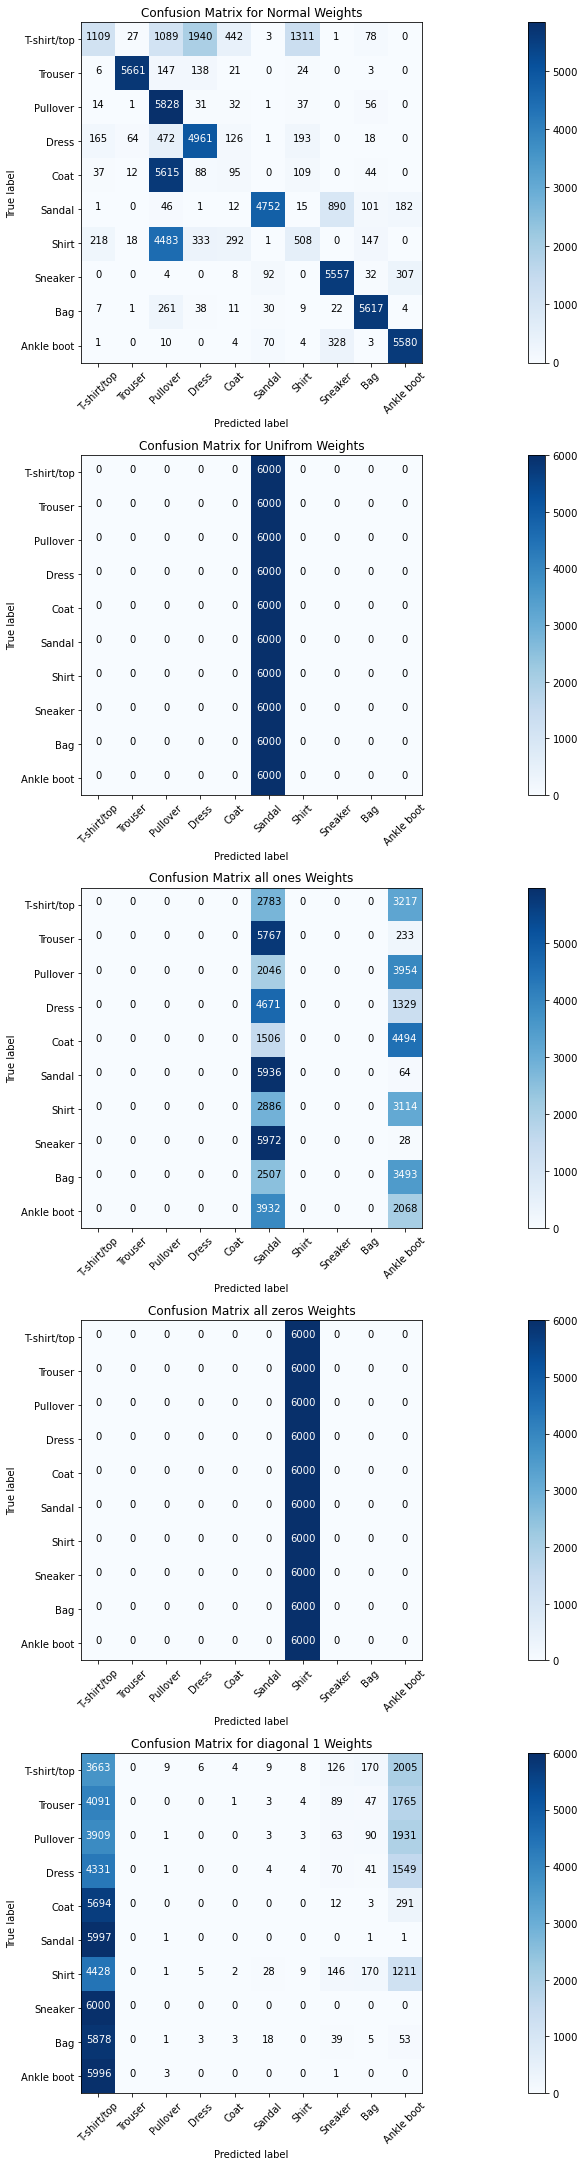

In [98]:
fig=plt.figure(figsize=(30, 30))
columns = 1
rows = 5
fig.add_subplot(rows, columns, 1)
plot_confusion_matrix(cm, train_data.classes)
plt.title('Confusion Matrix for Normal Weights')

fig.add_subplot(rows, columns, 2)
plot_confusion_matrix(cm1, train_data.classes)
plt.title('Confusion Matrix for Unifrom Weights')

fig.add_subplot(rows, columns, 3)
plot_confusion_matrix(cm2, train_data.classes)
plt.title('Confusion Matrix all ones Weights')

fig.add_subplot(rows, columns, 4)
plot_confusion_matrix(cm3, train_data.classes)
plt.title('Confusion Matrix all zeros Weights')

fig.add_subplot(rows, columns, 5)
plot_confusion_matrix(cm4, train_data.classes)
plt.title('Confusion Matrix for diagonal 1 Weights')
    

### Comparing different results:
From the accuracy and confusion matrix, we can see that model 1 with normal weight performs best when we run for 9 epochs, It is able to achieve 66% accuracy, that is much better than any other model.